In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
sns.set()


Bad key "“backend" on line 1 in
/Users/uday625/.matplotlib/matplotlibrc.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.2.2/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
sd = dt.datetime(2008,1,1)
ed = dt.datetime(2009,12,31)

In [28]:
df_price = pd.read_csv('./data/JPM.csv', index_col='Date',parse_dates=True,
                   na_values=['nan'],usecols=['Date','Adj Close'])

df_price = df_price.sort_index()

#aapl = aapl.rename(columns={'Adj Close':'AAPL'})

df_price = df_price[sd:ed]

df_price

,Adj Close
Date,
2008-01-02,38.47
2008-01-03,38.20
2008-01-04,37.33
2008-01-07,37.71
2008-01-08,36.21
...,...
2009-12-24,39.91
2009-12-28,39.75
2009-12-29,39.53


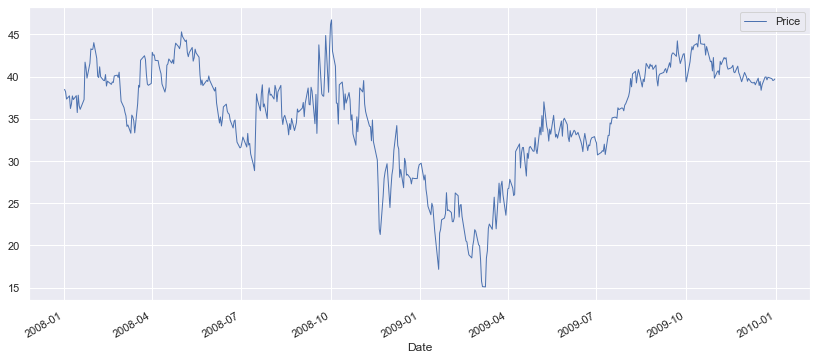

In [29]:
df_price['Adj Close'].plot(figsize=(14,6),lw=1,label='Price')
plt.legend()

In [30]:
data = df_price.copy()
period =20
column='Adj Close'

In [31]:
data['RollingMean'] = data[column].rolling(window=period).mean()
data['RollingStd'] = data[column].rolling(window=period).std()
data['UpperBand'] = data['RollingMean'] + (data['RollingStd'] * 2)
data['LowerBand'] = data['RollingMean'] - (data['RollingStd'] * 2)
data['BBBand'] = (data[column] - data['RollingMean']) / (2 * data[column].std())

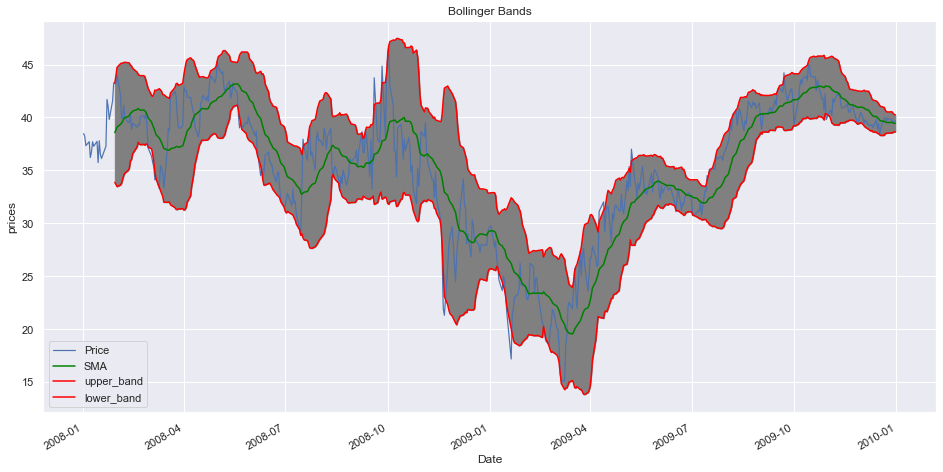

In [86]:

# Get index values for the X axis for facebook DataFrame
#x_axis = fb.index.get_level_values(0)



ax = data['Adj Close'].plot(figsize=(16,8),lw=1.2,label='Price',title='Bollinger Bands')

# Plot shaded 21 Day Bollinger Band for Facebook
ax.fill_between(data.index, data['UpperBand'], data['LowerBand'], color='grey')

data['RollingMean'].plot(label="SMA", ax=ax,color='green')
data['UpperBand'].plot ( label="upper_band", ax=ax, color='red' )
data['LowerBand'].plot ( label="lower_band", ax=ax, color='red' )
ax.set_xlabel("Date")
ax.set_ylabel("prices")
ax.legend(loc=0)

In [63]:
data['max'] = data[column].rolling(window=period).max()
data['min'] = data[column].rolling(window=period).min()
data['bolinger %b']=(data['Adj Close']-data['min'])/(data['max']-data['min'])
#data['bolinger %b']=25.01

In [64]:
data[['max','min','Adj Close','bolinger %b']].tail(20)

,max,min,Adj Close,bolinger %b
Date,,,,
2009-12-03,42.25,39.38,39.44,0.020906
2009-12-04,42.25,39.38,39.77,0.135889
2009-12-07,42.25,39.30,39.30,0.000000
2009-12-08,42.23,39.26,39.26,0.000000
2009-12-09,42.23,39.24,39.24,0.000000
2009-12-10,41.33,39.24,39.32,0.038278
2009-12-11,41.33,39.02,39.02,0.000000
2009-12-14,41.33,39.02,39.80,0.337662
2009-12-15,41.33,38.93,38.93,0.000000


In [55]:
39.44-39.38/(42.25-39.38)

25.718745644599288

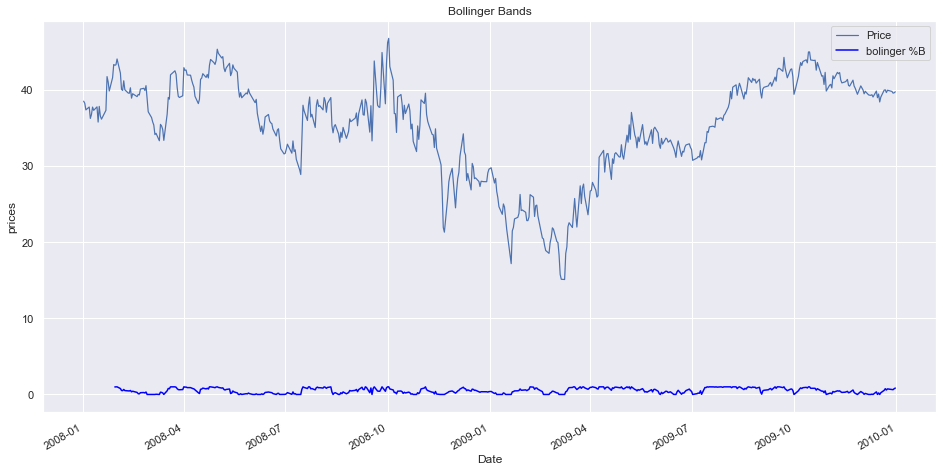

In [65]:
ax = data['Adj Close'].plot(figsize=(16,8),lw=1.2,label='Price',title='Bollinger Bands')
data['bolinger %b'].plot(label="bolinger %B", ax=ax,color='blue')
ax.set_xlabel("Date")
ax.set_ylabel("prices")
ax.legend(loc=0)

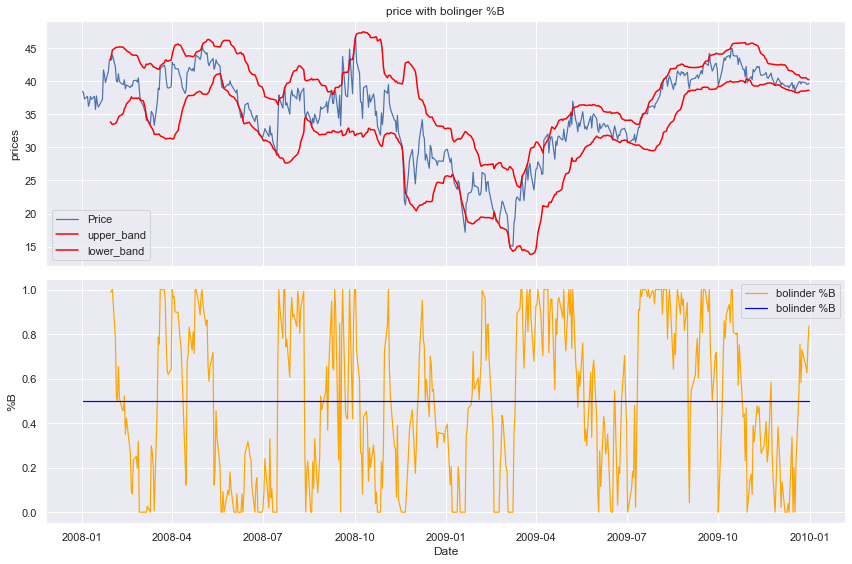

In [88]:
data['mid %b'] =.5
fig,(ax1,ax2) = plt.subplots(figsize=(12,8),nrows=2,ncols=1, sharex=True)
ax1.plot(data['Adj Close'],lw=1.2,label='Price')
ax1.plot(data['UpperBand'],label="upper_band", color='red' )
ax1.plot(data['LowerBand'],label="lower_band", color='red' )

#ax1.set_xlabel("Date")
ax1.set_ylabel("prices")
ax1.set_title("price with bolinger %B")

ax2.plot(data['bolinger %b'],lw=1.2,label='bolinder %B', color='orange', ls='-')
ax2.plot(data['mid %b'],lw=1.2,label='bolinder %B', color='blue', ls='-')
ax2.set_xlabel("Date")
ax2.set_ylabel("%B")

ax1.legend(loc=0)
ax2.legend(loc=0)
plt.tight_layout()

In [89]:
def RSI(series, n=14):
    # Get the difference in price from previous price
    series = series.copy().diff()

    # Get upwards and downwards gains
    up, down = series.copy(), series.copy()
    up[up < 0] = 0
    down[down > 0] = 0

    # Calculate the exponential weighted values
    roll_up1 = up.ewm(span=n,min_periods=0,adjust=False,ignore_na=False).mean()
    roll_down1 = down.abs().ewm(span=n,min_periods=0,adjust=False,ignore_na=False).mean()

    # Calculate the RSI based on EWMA
    RS1 = roll_up1 / roll_down1
    RSI1 = 100.0 - (100.0 / (1.0 + RS1))
    return(RSI1)

In [92]:
data_df = df_price.copy()
period =20
column='Adj Close'

In [93]:
data_df

,Adj Close
Date,
2008-01-02,38.47
2008-01-03,38.20
2008-01-04,37.33
2008-01-07,37.71
2008-01-08,36.21
...,...
2009-12-24,39.91
2009-12-28,39.75
2009-12-29,39.53


In [95]:
data_df['RSI'] = RSI(data_df[column], n=period)

In [96]:
data_df

,Adj Close,RSI
Date,,
2008-01-02,38.47,NaN
2008-01-03,38.20,0.000000
2008-01-04,37.33,0.000000
2008-01-07,37.71,10.894942
2008-01-08,36.21,7.384732
...,...,...
2009-12-24,39.91,52.038898
2009-12-28,39.75,50.306283
2009-12-29,39.53,47.883426


No handles with labels found to put in legend.


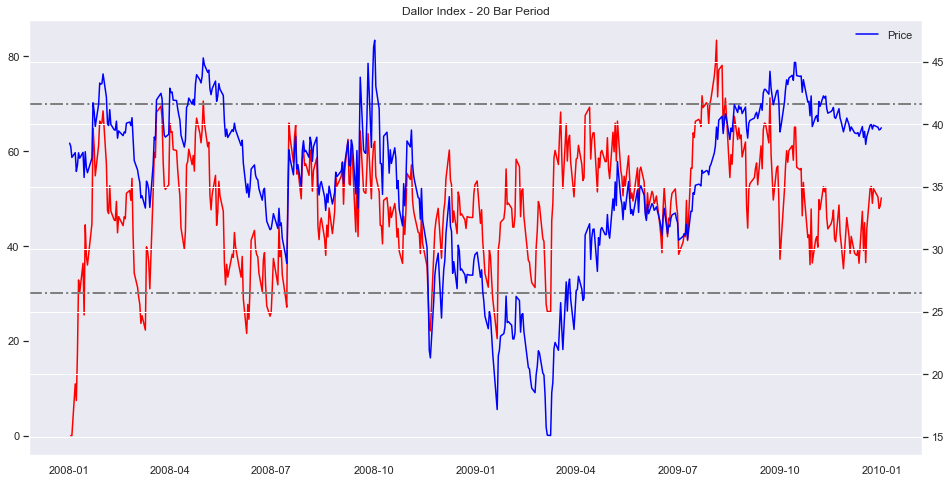

In [99]:
fig, ax = plt.subplots(figsize=(16, 8))
#plt.plot(data_df['Date'], data_df['RSI'], color='red')
plt.plot(data_df.index, data_df['RSI'], color='red')
plt.title('RSI Index - ' + str(period) + ' Bar Period')
plt.grid()
ax.legend(loc=0, frameon=False)

# overbought
plt.axhline(70, color='gray', linewidth=2, linestyle='-.' )
# oversold
plt.axhline(30, color='gray', linewidth=2, linestyle='-.' )

# Get second axis
ax2 = ax.twinx()
plt.plot(data_df.index,  data_df['Adj Close'], label='Price',color='blue')
ax2.legend(loc=0, frameon=False)

In [100]:
data = data_df.copy()

In [101]:
data

,Adj Close,RSI
Date,,
2008-01-02,38.47,NaN
2008-01-03,38.20,0.000000
2008-01-04,37.33,0.000000
2008-01-07,37.71,10.894942
2008-01-08,36.21,7.384732
...,...,...
2009-12-24,39.91,52.038898
2009-12-28,39.75,50.306283
2009-12-29,39.53,47.883426


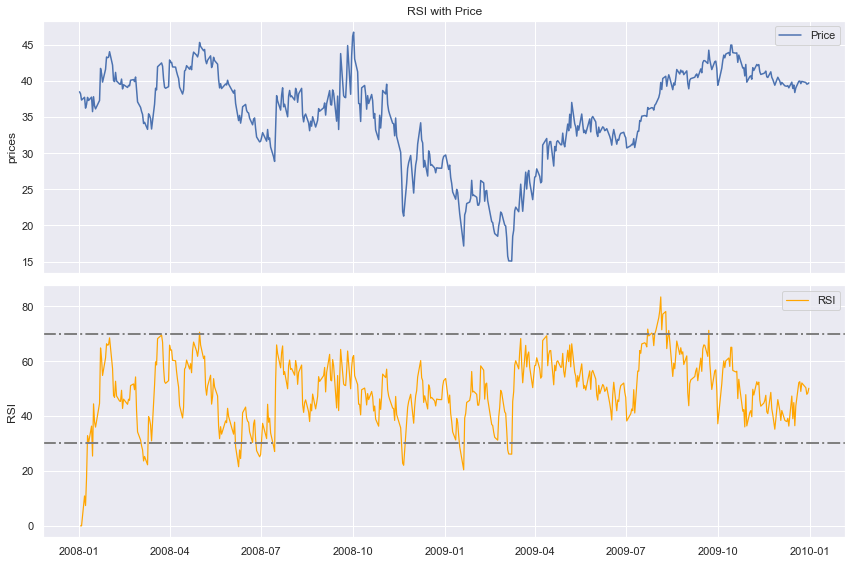

In [104]:
fig,(ax1,ax2) = plt.subplots(figsize=(12,8),nrows=2,ncols=1, sharex=True)
ax1.plot(data['Adj Close'],label='Price')

#ax1.plot(data['UpperBand'],label="upper_band", color='red' )
#ax1.plot(data['LowerBand'],label="lower_band", color='red' )

ax1.set_ylabel("prices")
ax1.set_title("RSI with Price")

ax2.plot(data['RSI'],lw=1.2,label='RSI', color='orange')

# overbought
ax2.axhline(70, color='gray', linewidth=2, linestyle='-.' )
# oversold
ax2.axhline(30, color='gray', linewidth=2, linestyle='-.' )

ax2.set_ylabel("RSI")
ax1.legend(loc=0)
ax2.legend(loc=0)
plt.tight_layout()

In [114]:
def ema(data, period=0, column='Adj Close'):
    data['ema' + str(period)] = data[column].ewm(ignore_na=False, min_periods=period, com=period, adjust=True).mean()
    
    return data

In [115]:
def macd(data, period_long=26, period_short=12, period_signal=9, column='Adj Close'):
    remove_cols = []
    if not 'ema' + str(period_long) in data.columns:
        data = ema(data, period_long)
        remove_cols.append('ema' + str(period_long))

    if not 'ema' + str(period_short) in data.columns:
        data = ema(data, period_short)
        remove_cols.append('ema' + str(period_short))

    data['macd_val'] = data['ema' + str(period_short)] - data['ema' + str(period_long)]
    data['macd_signal_line'] = data['macd_val'].ewm(ignore_na=False, min_periods=0, com=period_signal, adjust=True).mean()

    data = data.drop(remove_cols, axis=1)
        
    return data

In [106]:
data


,Adj Close,RSI
Date,,
2008-01-02,38.47,NaN
2008-01-03,38.20,0.000000
2008-01-04,37.33,0.000000
2008-01-07,37.71,10.894942
2008-01-08,36.21,7.384732
...,...,...
2009-12-24,39.91,52.038898
2009-12-28,39.75,50.306283
2009-12-29,39.53,47.883426


In [116]:
data = df_price.copy()
period =20
column='Adj Close'

In [117]:
data

,Adj Close
Date,
2008-01-02,38.47
2008-01-03,38.20
2008-01-04,37.33
2008-01-07,37.71
2008-01-08,36.21
...,...
2009-12-24,39.91
2009-12-28,39.75
2009-12-29,39.53


In [118]:
mcad_df = macd(data=data,column=column)

In [119]:
mcad_df

,Adj Close,macd_val,macd_signal_line
Date,,,
2008-01-02,38.47,NaN,NaN
2008-01-03,38.20,NaN,NaN
2008-01-04,37.33,NaN,NaN
2008-01-07,37.71,NaN,NaN
2008-01-08,36.21,NaN,NaN
...,...,...,...
2009-12-24,39.91,-0.437827,-0.273581
2009-12-28,39.75,-0.425814,-0.288805
2009-12-29,39.53,-0.422697,-0.302194


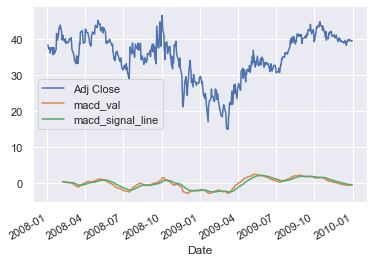

In [120]:
mcad_df.plot()

In [143]:
data['match'] = data.apply(lambda x: x.macd_val if (x.macd_val == x.macd_signal_line) else False, axis=1)

In [ ]:
data['match'] = data.apply(lambda x: TRUe if (x.macd_val == x.macd_signal_line) else False, axis=1)

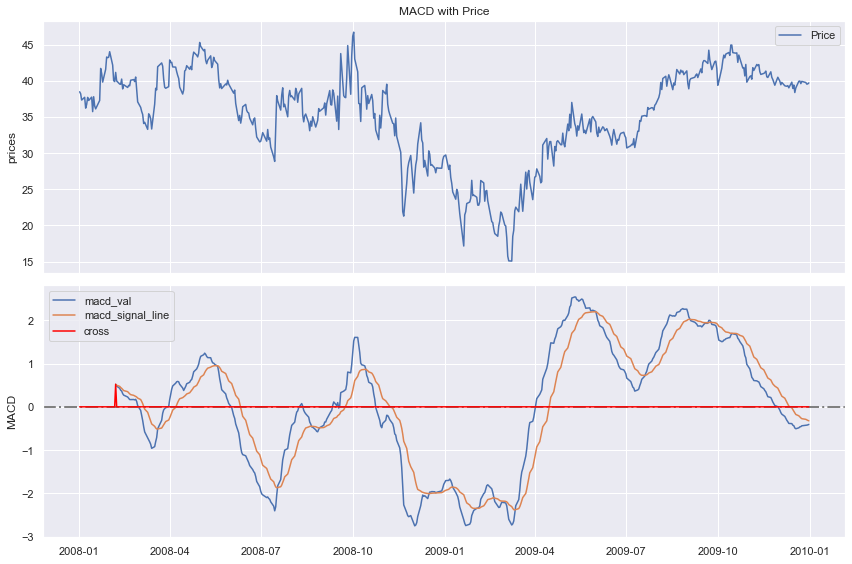

In [139]:
fig,(ax1,ax2) = plt.subplots(figsize=(12,8),nrows=2,ncols=1, sharex=True)
ax1.plot(data['Adj Close'],label='Price')

ax1.set_ylabel("prices")
ax1.set_title("MACD with Price")

ax2.plot(data['macd_val'],label='macd_val')
ax2.plot(data['macd_signal_line'],label='macd_signal_line')
ax2.axhline(0, color='gray', linewidth=2, linestyle='-.' )

ax2.plot(data['match'],label='cross', color='red')



ax2.set_ylabel("MACD")
ax1.legend(loc=0)
ax2.legend(loc=0)
plt.tight_layout()

In [137]:
#data['cross'] = data[data['macd_val']==data['macd_signal_line']]
data['match'] = data.apply(lambda x: x.macd_val if (x.macd_val == x.macd_signal_line) else 0, axis=1)


In [138]:
data

,Adj Close,ema26,ema12,macd_val,macd_signal_line,c,match
Date,,,,,,,
2008-01-02,38.47,NaN,NaN,NaN,NaN,0.0,0.0
2008-01-03,38.20,NaN,NaN,NaN,NaN,0.0,0.0
2008-01-04,37.33,NaN,NaN,NaN,NaN,0.0,0.0
2008-01-07,37.71,NaN,NaN,NaN,NaN,0.0,0.0
2008-01-08,36.21,NaN,NaN,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...
2009-12-24,39.91,40.293181,39.855354,-0.437827,-0.273581,0.0,0.0
2009-12-28,39.75,40.273063,39.847250,-0.425814,-0.288805,0.0,0.0
2009-12-29,39.53,40.245542,39.822846,-0.422697,-0.302194,0.0,0.0
